In [20]:
#Importing the Libraries
import pandas as pd
import numpy as np
import math as math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix
import matplotlib. dates as mandates
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
#Get the Dataset
df=pd.read_csv('./data/SAP Dataset 2016-2021 - XETRA EUR.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-09,76.449997,78.529999,75.500000,78.529999,71.981308,4242667
2016-11-10,79.070000,79.199997,76.889999,77.379997,70.927216,3303639
2016-11-11,77.680000,77.989998,75.629997,76.449997,70.074768,3323169
2016-11-14,77.089996,77.110001,75.559998,75.839996,69.515633,2721927
2016-11-15,76.239998,76.279999,75.070000,75.970001,69.634796,2433644


In [3]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df. shape)

Dataframe Shape:  (1267, 6)


<AxesSubplot:xlabel='Date'>

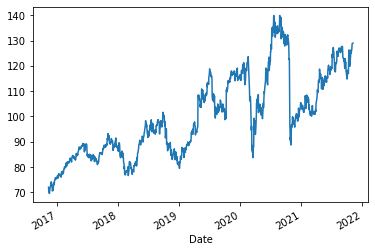

In [4]:
#Plot Adjusted Close Price
df['Adj Close'].plot()

In [5]:
#Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])

#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [6]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2016-11-09,0.006736,0.033562,0.006514,0.191108
2016-11-10,0.045958,0.043556,0.027572,0.148810
2016-11-11,0.025150,0.025507,0.008484,0.149690
2016-11-14,0.016317,0.012381,0.007423,0.122607
2016-11-15,0.003593,0.000000,0.000000,0.109622


In [7]:
#Splitting to Training set and Test set (Ratio: 80:20)
timesplit= TimeSeriesSplit(n_splits=20)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [8]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

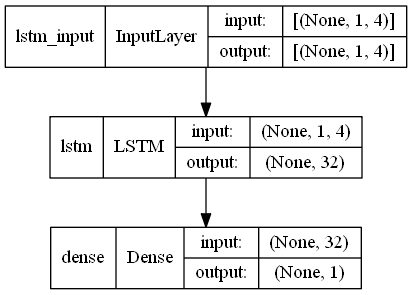

In [9]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [10]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False)

Epoch 1/200
151/151 [==============================] - 2s 2ms/step - loss: 9931.7559
Epoch 2/200
151/151 [==============================] - 0s 2ms/step - loss: 9420.0625
Epoch 3/200
151/151 [==============================] - 0s 2ms/step - loss: 8233.5840
Epoch 4/200
151/151 [==============================] - 0s 2ms/step - loss: 6481.5781
Epoch 5/200
151/151 [==============================] - 0s 2ms/step - loss: 4568.2603
Epoch 6/200
151/151 [==============================] - 0s 2ms/step - loss: 2874.2610
Epoch 7/200
151/151 [==============================] - 0s 2ms/step - loss: 1618.6046
Epoch 8/200
151/151 [==============================] - 0s 2ms/step - loss: 840.9520
Epoch 9/200
151/151 [==============================] - 0s 2ms/step - loss: 443.0253
Epoch 10/200
151/151 [==============================] - 0s 2ms/step - loss: 272.9794
Epoch 11/200
151/151 [==============================] - 0s 3ms/step - loss: 207.2879
Epoch 12/200
151/151 [==============================] - 0s 3ms/step

In [11]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

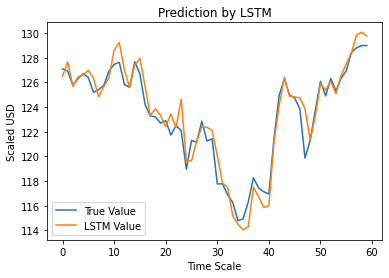

In [12]:
#Predicted x True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [24]:
#Model Accuracy = R2 Score
print(r2_score(y_test, y_pred))

#Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.9279122025646206
1.0369339426415025
